### Setting the Brand

In [2]:
brand = 'pepsi'

# 1. Chargement du CSV

In [3]:
import csv 
def load_csv(file):
    rows = []
    with open(file, newline='',encoding='utf-8-sig') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            rows.append(row)
    return rows

In [4]:
import nltk
from nltk.tokenize import word_tokenize

def get_words(tweets):
    L = []
    tweets_2 = [row.get('tweet') for row in tweets if row.get('tweet') != None]
    for k in range(len(tweets_2)) :
        sentence = word_tokenize(tweets_2[k])
        for word in sentence :
            L.append(word)
    return L 

In [5]:
import nltk
import string
from nltk.corpus import stopwords

def clean(words_list) :
    filtered_words = [word for word in words_list if word not in stopwords.words('english')]
    filtered_words = [''.join(c for c in s if c not in string.punctuation) for s in filtered_words]
    filtered_words = [s for s in filtered_words if s]
    filtered_words = [s for s in filtered_words if len(s) > 1]
    return filtered_words

## 1.1 Lecture du premier CSV Pepsi

In [8]:
BRAND = load_csv('../../data/extraction_twint/tweets_data/data_marketing_personalise/' + brand +'.csv')
words = get_words(BRAND)
print(words[:20])

['@', 'PatMcAfeeShow', '@', 'Jaguars', 'Please', 'explain', 'how', 'the', '@', 'pepsi', 'NFL', 'ROY', 'will', 'have', 'only', 'won', 'the', 'Pepsi', 'Rookie', 'of']


## 1.2 Detection de 'Faux' Tweets

In [6]:
Tweets = []
for row in BRAND :
    Tweets.append([row.get('tweet'),row.get('hashtags'), False, row.get('user_id')])

for row in Tweets :
    if brand.upper() in row[0].upper() :
        row[2] = True
    else :
        for hastags in row[1] :
            if brand.upper() in hastags.upper() :
                row[2] = True
Tweets[0:5]
compte = 0
false_users = []
for row in Tweets :
    if row[2] :
        compte +=1
    else :
        false_users.append(int(row[3]))
        
print(compte)
false_users

100


[]

In [7]:
import pandas as pd 
users_pd = pd.read_csv('../../data/extraction_twint/tweets_data/data_marketing_personalise/'+brand+'_users.csv')
masque = users_pd['user_id'] == 2981521646
users_pd[masque]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date


## 1.3 Sentiment Analysis

In [8]:
import re
from textblob import TextBlob

def clean_tweet(tweet): 

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
    
def get_tweet_sentiment(tweet): 
 
    analysis = TextBlob(clean_tweet(tweet)) 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
    
print(Tweets[0][0])
print(clean_tweet(Tweets[0][0]))
get_tweet_sentiment(Tweets[0][0])

@PatMcAfeeShow @Jaguars Please explain how the @pepsi NFL ROY will have only won the Pepsi Rookie of the Week at most once. Yet @GardnerMinshew5 won that award 7 times and was left off the finals list. @pepsi is a STOOGE and a SELLAHT!!
Please explain how the NFL ROY will have only won the Pepsi Rookie of the Week at most once Yet won that award 7 times and was left off the finals list is a STOOGE and a SELLAHT!!


'positive'

In [9]:
for row in Tweets :
    sentiment = get_tweet_sentiment(row[0])
    row.append(sentiment)
print(len(Tweets))
print(Tweets[:5])
df = pd.DataFrame(Tweets, columns = ['Tweet', 'Hashtags', 'True', 'UserId', 'Sentiment'])
df = df[['UserId','Sentiment']]
UserSentiment = df
df

100
[['@PatMcAfeeShow @Jaguars Please explain how the @pepsi NFL ROY will have only won the Pepsi Rookie of the Week at most once. Yet @GardnerMinshew5 won that award 7 times and was left off the finals list. @pepsi is a STOOGE and a SELLAHT!!', '[]', True, '1209160423208964098', 'positive'], ["Huh. They don't list Pepsi Max anymore. Is that not a thing? But yeah, Aspertame is horrible crap. Stevia has a weird aftertaste, but at least it's natural. (I just drink the regular sugared Pepsi)", '[]', True, '3192235720', 'negative'], ['How very dismissive  of you @cocacola . taking you and your products off my shopping list. @pepsi was always better anyways.  https://twitter.com/SassBaller/status/1220408009270222848\xa0…', '[]', True, '21125396', 'positive'], ['0. Universeclass, start a list of the stuff you plan to release because it slows you down. Line through--no return!--when achieved. 1. Here is our short list: Pepsi/soft drinks, meat, Fear, other . . .', '[]', True, '387079035', 'neg

,UserId,Sentiment
0,1209160423208964098,positive
1,3192235720,negative
2,21125396,positive
3,387079035,negative
4,1080290909789581312,neutral
...,...,...
95,375886647,positive
96,4186795040,positive
97,701224416189898752,neutral
98,764662076644089856,positive


# 2. NER avec Spacy


In [31]:
import spacy
from spacy import displacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

ex = 'Apple is a big company, located in California. It was created by Steve Jobs'
doc = nlp(ex)
print(ex)
L = []
for ent in doc.ents:
    L.append((ent.text, ent.label_))
print(L)

Apple is a big company, located in California. It was created by Steve Jobs
[('Apple', 'ORG'), ('California', 'GPE'), ('Steve Jobs', 'PERSON')]


In [32]:
nlp = spacy.load("en_core_web_sm")

ex = 'Apple is a big company, located in California. It was created by Steve Jobs'
doc = nlp(ex)
print(ex)
L = []
for ent in doc.ents:
    L.append((ent.text, ent.label_))
print(L)

Apple is a big company, located in California. It was created by Steve Jobs
[('Apple', 'ORG'), ('California', 'GPE'), ('Steve Jobs', 'PERSON')]


In [11]:

NER = []
tweets = load_csv('../../data/extraction_twint/tweets_data/data_marketing_personalise/' +brand+ '_users.csv')
print(len(tweets))
for row in tweets :
    if row.get('tweet') != None :
        (text, user) = ( nlp(row.get('tweet')) , row.get('user_id') )
        NER.append((text , user))          

4780


In [12]:
from random import randint
NER_2 = []
for X in NER : 
    sentiment = get_tweet_sentiment(X[0].text)
    NER_2.append((X[0], sentiment, X[1]))
k = randint(1, len(NER_2))
k
print(NER_2[k])

(Monique Wright on @sunriseon7 upset Jacinta Ardern didn't bring up climate change with @ScottMorrisonMP 
No surprise when you're worried your fudged figures by removing agriculture from emission count would be exposed, 'neutral', '2236728919')


## Including our sentiment analysis

In [13]:
Organizations = []
Groups = []
Persons = []

ORG = []
GPE = []
PER = []
k = 0
for text in NER_2 :
    k += 1
    sentiment = text[1]
    for X in text[0].ents :
        
        if X.label_ == 'ORG' and len(X.text) > 1 :
            Organizations.append(X.text)
            ORG.append((X.text, sentiment, text[2]))
        if X.label_ == 'GPE' and len(X.text) > 1 :
            Groups.append(X.text)
            GPE.append((X.text, sentiment, text[2]))
        if X.label_ == 'PERSON' and len(X.text) > 1 :
            Persons.append(X.text)
            PER.append((X.text, sentiment, text[2]))
            
print(Persons[:5])
print(PER[:5])
print(len(Persons))
print(len(PER))

['Mr Woods', 'Kay', 'Mr Woods', 'Kay', 'Mr Woods']
[('Mr Woods', 'neutral', '387079035'), ('Kay', 'neutral', '387079035'), ('Mr Woods', 'neutral', '387079035'), ('Kay', 'neutral', '387079035'), ('Mr Woods', 'positive', '387079035')]
1596
1596


In [14]:
def list_to_dict(list) :
    counts = dict()
    for i in list:
        counts[i] = counts.get(i, 0) + 1
    counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse = True)}
    return (counts)

def to_perc(dict) :
    for key in dict : 
        dict[key] = (dict[key]/ len(NER))*100
               

## Converting our list to a Dataframe

In [15]:
import pandas as pd

def to_df(L, Junk) :
    L2 = []    
    for X in L :

        if X[1] == 'negative' :
            L2.append([X[0],X[2],1,0,0,0,0,0])
        if X[1] == 'neutral' :
            L2.append([X[0],X[2],0,1,0,0,0,0])
        if X[1] == 'positive' :
            L2.append([X[0],X[2],0,0,1,0,0,0])  
    for X in L2 : 
        sentiment = UserSentiment.loc[UserSentiment['UserId'] == X[1]]['Sentiment'].iloc[0]
        if sentiment == 'negative' :
            X[5] = 1
        if sentiment == 'neutral' :
            X[6] = 1
        if sentiment == 'positive' :
            X[7] = 1
        
    
    df = pd.DataFrame(L2, columns =['Entity', 'UserId','Negative','Neutral','Positive', 'Brand_negative','Brand_neutral','Brand_positive'])
    df = df.groupby(['Entity','UserId']).sum()  
    df['Sum'] = df['Negative'] + df['Positive'] + df['Neutral']
    for x in ['Negative','Neutral','Positive', 'Brand_negative','Brand_neutral','Brand_positive','Sum'] :
        df[x] = df[x]/df['Sum']
    df = df.groupby(['Entity']).sum()
    df = df[~df.index.isin(Junk)]
    df = df.sort_values('Sum', ascending=False)
    df = df.head(15)
    del df['Sum']
    
    return df

Pers_df = to_df(PER, [])
Pers_df

,Negative,Neutral,Positive,Brand_negative,Brand_neutral,Brand_positive
Entity,,,,,,
Trump,8.888889,4.122222,12.988889,3.0,13.0,10.0
Bernie,3.666667,3.833333,4.500000,4.0,3.0,5.0
Hillary,0.833333,5.666667,3.500000,2.0,5.0,3.0
Pete,0.000000,3.000000,5.000000,2.0,4.0,2.0
Clinton,2.500000,2.000000,3.500000,0.0,5.0,3.0
Joe,1.000000,1.000000,3.000000,1.0,3.0,1.0
Coronavirus,1.000000,1.500000,2.500000,1.0,1.0,3.0
Castro,0.000000,3.000000,1.000000,0.0,2.0,2.0
Biden,1.200000,1.600000,1.200000,2.0,2.0,0.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def to_df_2(L, Target) :
    L2 = []    
    for X in L :

        if X[1] == 'negative' :
            L2.append([X[0],X[2],1,0,0,0,0,0])
        if X[1] == 'neutral' :
            L2.append([X[0],X[2],0,1,0,0,0,0])
        if X[1] == 'positive' :
            L2.append([X[0],X[2],0,0,1,0,0,0])  
    for X in L2 : 
        sentiment = UserSentiment.loc[UserSentiment['UserId'] == X[1]]['Sentiment'].iloc[0]
        if sentiment == 'negative' :
            X[5] = 1
        if sentiment == 'neutral' :
            X[6] = 1
        if sentiment == 'positive' :
            X[7] = 1
        
    
    df = pd.DataFrame(L2, columns =['Entity', 'UserId','Negative','Neutral','Positive', 'Brand_negative','Brand_neutral','Brand_positive'])
    df = df.groupby(['Entity','UserId']).sum()  
    df['Sum'] = df['Negative'] + df['Positive'] + df['Neutral']
    df = df.reset_index()
    df = df[df.Entity.isin(Target)]
    for x in ['Negative','Neutral','Positive', 'Brand_negative','Brand_neutral','Brand_positive','Sum'] :
        df[x] = df[x]/df['Sum']
    df = df.groupby(['Brand_negative','Brand_neutral','Brand_positive']).sum()
    df = df.reset_index()
    del df['Sum']
    del df['Brand_negative']
    del df['Brand_neutral']
    del df['Brand_positive']
    labels = ['Positive', 'Neutral', 'Negative']
    df['Pepsi Sentiment'] = labels
    df = df.set_index('Pepsi Sentiment')
    
    return df

Pers_df = to_df_2(GPE, ['America'])
print(Pers_df)
cols = ['Negative','Neutral','Positive']
Pers_df[cols] = Pers_df[cols].div(Pers_df[cols].sum(axis=0), axis=1).multiply(100)
print(Pers_df)


f, ax = plt.subplots(figsize=(7, 4))
sns.set()
ax = sns.heatmap(Pers_df, annot=True,linewidths=.5, cmap = 'YlOrRd')
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.xaxis.tick_top()
ax.set_title('America Sentiment', fontsize = 16, fontweight='bold')
ax.set_ylabel(brand.capitalize() + ' Sentiment', fontsize = 15, fontweight='bold')
plt.yticks(np.arange(3)+0.5,('Positive','Neutral','Negative'), rotation=45, fontsize="10", va="center")
ax.set_ylim(3.0, 0)

NameError: name 'GPE' is not defined

## 2.1 Organisations

In [17]:
Dict_Orga = list_to_dict(Organizations)
to_perc(Dict_Orga)
print(list(Dict_Orga.items())[:5])

[('GOP', 0.5649717514124294), ('House', 0.3347980749110693), ('DNC', 0.2929483155471856), ('CNN', 0.2929483155471856), ('Pelosi', 0.2301736765013601)]


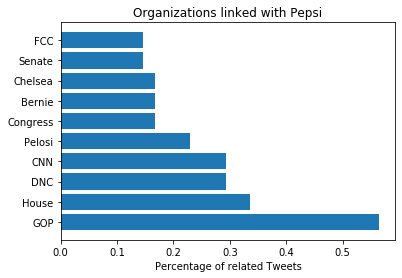

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

D = dict(list(Dict_Orga.items())[:10])
plt.barh(*zip(*D.items()))
plt.title('Organizations linked with '+brand.capitalize())
plt.xlabel('Percentage of related Tweets')
plt.show()

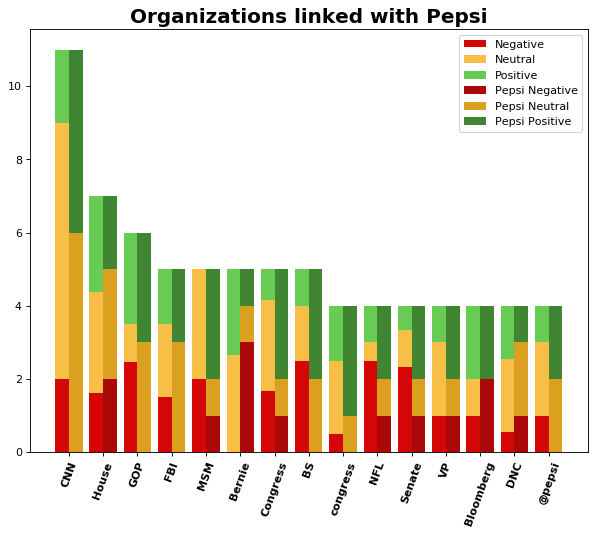

In [19]:
Org_df = to_df(ORG, [])

import numpy as np

barWidth = 0.4
r1 = np.arange(15)
r2 = [x + barWidth for x in r1]
figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')

plt.bar(r1, Org_df['Negative'],color='#d40606',width=barWidth, label='Negative')
plt.bar(r1, Org_df['Neutral'],width=barWidth,color='#f7bf45', bottom = Org_df['Negative'], label='Neutral')
plt.bar(r1, Org_df['Positive'],width=barWidth, color='#68cc54',bottom = Org_df['Negative']+Org_df['Neutral'], label='Positive')

plt.bar(r2, Org_df['Brand_negative'],color='#ab0909',width=barWidth, label=brand.capitalize()+' Negative')
plt.bar(r2, Org_df['Brand_neutral'],color='#dba01f',width=barWidth, bottom = Org_df['Brand_negative'], label=brand.capitalize()+' Neutral')
plt.bar(r2, Org_df['Brand_positive'],color='#408532',width=barWidth, bottom = Org_df['Brand_negative']+Org_df['Brand_neutral'], label=brand.capitalize()+' Positive')

plt.xticks((r1+r2)/2, Org_df.index, fontweight='bold', rotation=70)
plt.title('Organizations linked with '+brand.capitalize(),fontweight='bold', fontsize = 18)


plt.legend()
plt.show()

## 2.2 Groupes

In [20]:
Dict_Group = list_to_dict(Groups)
to_perc(Dict_Group)
print(list(Dict_Group.items())[:5])

[('America', 0.6277463904582549), ('US', 0.5021971123666039), ('China', 0.2929483155471856), ('Iran', 0.2720234358652438), ('Russia', 0.2720234358652438)]


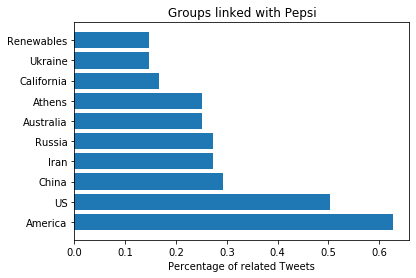

In [21]:
D = dict(list(Dict_Group.items())[:10])
plt.barh(*zip(*D.items()))
plt.title('Groups linked with '+brand.capitalize())
plt.xlabel('Percentage of related Tweets')
plt.show()

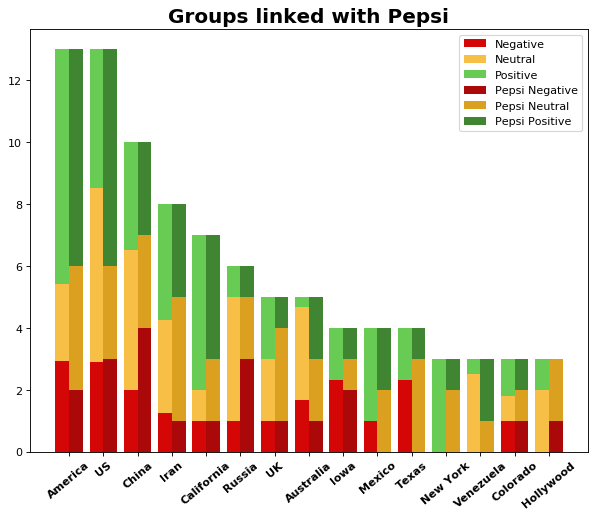

In [22]:
import numpy as np

Gpe_df = to_df(GPE, ['kinda', 'Obama'])

barWidth = 0.4
r1 = np.arange(15)
r2 = [x + barWidth for x in r1]

figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')

plt.bar(r1, Gpe_df['Negative'],color='#d40606',width=barWidth, label='Negative')
plt.bar(r1, Gpe_df['Neutral'],width=barWidth,color='#f7bf45', bottom = Gpe_df['Negative'], label='Neutral')
plt.bar(r1, Gpe_df['Positive'],width=barWidth, color='#68cc54',bottom = Gpe_df['Negative']+Gpe_df['Neutral'], label='Positive')

plt.bar(r2, Gpe_df['Brand_negative'],color='#ab0909',width=barWidth, label=brand.capitalize()+' Negative')
plt.bar(r2, Gpe_df['Brand_neutral'],color='#dba01f',width=barWidth, bottom = Gpe_df['Brand_negative'], label=brand.capitalize()+' Neutral')
plt.bar(r2, Gpe_df['Brand_positive'],color='#408532',width=barWidth, bottom = Gpe_df['Brand_negative']+Gpe_df['Brand_neutral'], label=brand.capitalize()+' Positive')

plt.xticks((r1+r2)/2, Gpe_df.index, fontweight='bold', rotation=40)
plt.title('Groups linked with '+brand.capitalize(),fontweight='bold', fontsize = 18)

plt.legend()
plt.show()


## 2.3 Personnes

In [23]:
Dict_Perso = list_to_dict(Persons)
to_perc(Dict_Perso)
print(list(Dict_Perso.items())[:5])

[('Trump', 1.360117179326219), ('Bernie', 0.4184975936388366), ('Hillary', 0.39757271395689475), ('Joe Biden', 0.3766478342749529), ('Amy', 0.2929483155471856)]


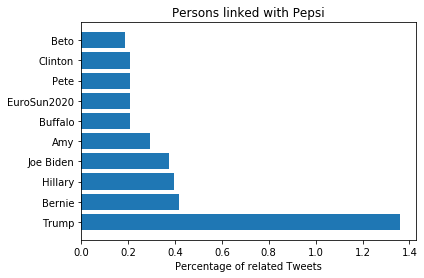

In [24]:
P = dict(list(Dict_Perso.items())[:10])
plt.barh(*zip(*P.items()))
plt.title('Persons linked with '+brand.capitalize())
plt.xlabel('Percentage of related Tweets')
plt.show()

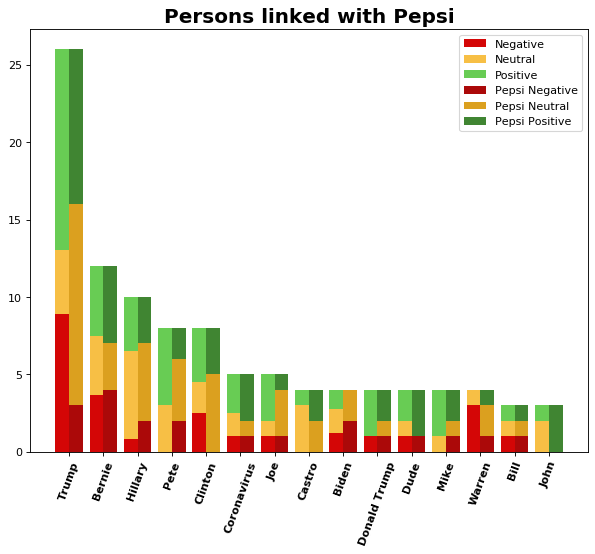

In [25]:
Pers_df = to_df(PER, ['Haha', 'lol', 'LOL'])

barWidth = 0.4
r1 = np.arange(15)
r2 = [x + barWidth for x in r1]

figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')

plt.bar(r1, Pers_df['Negative'],color='#d40606',width=barWidth, label='Negative')
plt.bar(r1, Pers_df['Neutral'],width=barWidth,color='#f7bf45', bottom = Pers_df['Negative'], label='Neutral')
plt.bar(r1, Pers_df['Positive'],width=barWidth, color='#68cc54',bottom = Pers_df['Negative']+Pers_df['Neutral'], label='Positive')

plt.bar(r2, Pers_df['Brand_negative'],color='#ab0909',width=barWidth, label=brand.capitalize()+' Negative')
plt.bar(r2, Pers_df['Brand_neutral'],color='#dba01f',width=barWidth, bottom = Pers_df['Brand_negative'], label=brand.capitalize()+' Neutral')
plt.bar(r2, Pers_df['Brand_positive'],color='#408532',width=barWidth, bottom = Pers_df['Brand_negative']+Pers_df['Brand_neutral'], label=brand.capitalize()+' Positive')

plt.xticks((r1+r2)/2, Pers_df.index, fontweight='bold', rotation=70)
plt.title('Persons linked with '+brand.capitalize(), fontweight='bold', fontsize = 18)

plt.legend()
plt.show()

# 3. Tentative avec Stanford NLP

In [26]:
import nltk
from nltk.tag import StanfordPOSTagger
from nltk import word_tokenize

import os
java_path = "/Users/simon/jdk-13.0.2/bin/java.exe"
os.environ['JAVAHOME'] = java_path

jar = '/Users/simon/stanford-postagger-2018-10-16/stanford-postagger.jar'
model = '/Users/simon/stanford-postagger-2018-10-16/models/english-left3words-distsim.tagger'

pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

pos_tagger.tag('Google is a big company and does not match with Apple'.split())
print('Google is a big company and does not match with Apple'.split())


['Google', 'is', 'a', 'big', 'company', 'and', 'does', 'not', 'match', 'with', 'Apple']


In [27]:
tweets = load_csv('../data/extraction_twint/tweets_data/data_marketing_personalise/pepsi_users.csv')
words_list = get_words(tweets)
print(len(tweets))
print(len(words_list))

filtered_words = clean(words_list)
print(len(filtered_words))
print(filtered_words[:100])

4780
96644
49784
['Mr', 'Woods', 'made', 'Sun', 'Kay', 'hides', 'Who', 'Cosmos', 'Mr', 'Woods', 'Kay', 'Said', 'yesterday', 'say', 'Today', 'stock', 'market', 'Dividends', 'keep', 'rolling', 'though', 'One', 'reasons', 'NEVER', 'try', 'TIME', 'market', 'Dividends', 'Investing', 'Money', 'Patience', 'https', 'wwwdividenddiplomatscomdonttimepredictmarket', 'MLK', 'III', 'pleads', 'Alabama', 'governor', 'stop', 'execution', 'Nathanial', 'Woods', 'convicted', 'slayings', 'cops', 'https', 'wwwyahoocomgmamlkiiipleadsalabamagovernorstopexecutionnathanial170300291', 'abcnewstopstorieshtml', 'Mr', 'Woods', 'Kay', 'Iveyproof', 'decide', 'go', 'return', 'help', 'us', 'KIL', 'HER', 'WHOLE', 'BLOODLINE', 'Insanity', '50', 'point', 'rate', 'cut', 'Sucks', 'savings', 'accounts', 'Great', 're', 'looking', 'refinance', 'buy', 'home', 'https', 'wwwcnbccom20200303fedcutsratesbyhalfapercentagepointtocombatcoronavirusslowdownhtml', 'Atlanta', 'Man', 'Pretended', 'Be', 'Gay', 'So', 'He', 'Could', 'Earn', 'W

In [28]:
import time
NER_2 = []
for k in range(30) :
    start = time.time()
    text = pos_tagger.tag(filtered_words[k].split())
    end = time.time()
    print(end-start, text)
    NER_2.append(text)

print(NER_2[:20])

1.867680311203003 [('Mr', 'NNP')]
1.6650900840759277 [('Woods', 'NNP')]
1.6679813861846924 [('made', 'VBN')]
2.198638916015625 [('Sun', 'NNP')]
2.360909938812256 [('Kay', 'NNP')]
2.2849948406219482 [('hides', 'NNS')]
2.4153454303741455 [('Who', 'WP')]
2.3432304859161377 [('Cosmos', 'NNP')]
2.4259438514709473 [('Mr', 'NNP')]
2.263519525527954 [('Woods', 'NNP')]
2.165465831756592 [('Kay', 'NNP')]
1.9029765129089355 [('Said', 'NNP')]
1.828214168548584 [('yesterday', 'NN')]
2.0744261741638184 [('say', 'VB')]
2.2113285064697266 [('Today', 'NN')]
1.781628131866455 [('stock', 'NN')]
1.6366162300109863 [('market', 'NN')]
1.7109637260437012 [('Dividends', 'NNS')]
1.7307071685791016 [('keep', 'VB')]
1.843763828277588 [('rolling', 'VBG')]
1.6722619533538818 [('though', 'IN')]
1.6326816082000732 [('One', 'CD')]
1.5319421291351318 [('reasons', 'NNS')]
1.6161448955535889 [('NEVER', 'NN')]
1.7487459182739258 [('try', 'VB')]
1.882364273071289 [('TIME', 'NN')]
2.127577066421509 [('market', 'NN')]
1.954

In [29]:
print(NER_2)

[[('Mr', 'NNP')], [('Woods', 'NNP')], [('made', 'VBN')], [('Sun', 'NNP')], [('Kay', 'NNP')], [('hides', 'NNS')], [('Who', 'WP')], [('Cosmos', 'NNP')], [('Mr', 'NNP')], [('Woods', 'NNP')], [('Kay', 'NNP')], [('Said', 'NNP')], [('yesterday', 'NN')], [('say', 'VB')], [('Today', 'NN')], [('stock', 'NN')], [('market', 'NN')], [('Dividends', 'NNS')], [('keep', 'VB')], [('rolling', 'VBG')], [('though', 'IN')], [('One', 'CD')], [('reasons', 'NNS')], [('NEVER', 'NN')], [('try', 'VB')], [('TIME', 'NN')], [('market', 'NN')], [('Dividends', 'NNS')], [('Investing', 'VBG')], [('Money', 'NN')]]


In [77]:
Orga_2 = []
for row in NER_2 :
    for word in row : 
        if word[1] == 'NNP' :
            Orga_2.append(word[0])

Dict_Orga_2 = list_to_dict(Orga_2)
print(list(Dict_Orga_2.items())[:40])
    

[('Belarus', 6), ('Big', 2), ('Guisborough', 2), ('Russian', 1), ('Serbia', 1), ('Nadezhda', 1), ('Makarchenko', 1), ('World', 1), ('Museum', 1), ('Durham', 1), ('Neighbours', 1), ('Trade', 1), ('Obamacare', 1), ('Chris', 1), ('Brighton', 1), ('CO', 1), ('Europe', 1), ('Russia', 1), ('IMF', 1), ('UK', 1), ('Black', 1), ('Buttigieg', 1), ('South', 1), ('Bend', 1), ('Lukashenka', 1), ('Caviar', 1), ('UAE', 1), ('Qatar', 1), ('Jersey', 1), ('Merry', 1), ('Christmas', 1), ('Hope', 1)]


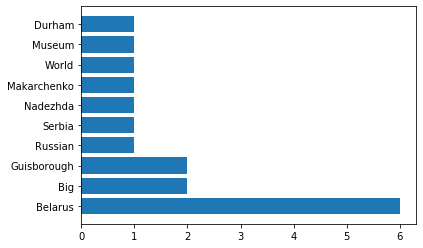

In [78]:
M = dict(list(Dict_Orga_2.items())[:10])
plt.barh(*zip(*M.items()))
plt.show()